In [4]:
%load_ext autoreload
%autoreload 2
from data_loader import load_datasets, create_data_loaders
import torch
from training_pipeline import train_with_different_parameters, plot_results, train_with_augmentation
from training_pipeline import repeat_training
import os
from cnn_model import Net
import numpy as np
import random

SEED = 42

In [5]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [6]:
set_seed(SEED)
# optimal parameters
batch_size = 128
learning_rate = 0.0005
dropout = 0.4
betas = (0.7, 0.997)
weight_decay = 1e-5

In [4]:
# impact of augmentation compared with no augmentation
augs = ['rotation', 'blur', 'bright', 'cutout', 'none']
for i in range(5):
    train, val, test = load_datasets((32, 32), apply_rotation=i==0,
                                                        apply_blur = i==1,
                                                        apply_brightness= i==2,
                                                        apply_cutout = i==3)
    train_dat, val_dat, test_dat = create_data_loaders(train, val, test, batch_size)
    aug = augs[i]
    set_seed(SEED)
    train_with_augmentation(5, Net, 10, train_dat, val_dat, test_dat, 'cuda', batch_size, lr=learning_rate, drop=dropout, beta=betas, aug=aug, weight_decay=weight_decay)

training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.01276948216954867, training accuracy: 39.54
epoch: 1, validation loss: 1.5056460433536105e-05, validation accuracy: 49.80111111111111
model saved

epoch: 2, training loss: 0.011043222184975943, training accuracy: 48.64055555555556
epoch: 2, validation loss: 1.5298467212253147e-05, validation accuracy: 53.17

epoch: 3, training loss: 0.0103548708597819, training accuracy: 51.91388888888889
epoch: 3, validation loss: 1.1730436484018962e-05, validation accuracy: 56.17888888888889
model saved

epoch: 4, training loss: 0.009934243379036586, training accuracy: 54.15222222222222
epoch: 4, validation loss: 1.2933872805701361e-05, validation accuracy: 59.11222222222222

epoch: 5, training loss: 0.009590977614455752, training accuracy: 55.76277777777778
epoch: 5, validation loss: 9.420054488711887e-06, validation accuracy: 60.23777777777778
model saved

epoch: 6, training loss: 0.009356130562557114, training accuracy: 56.

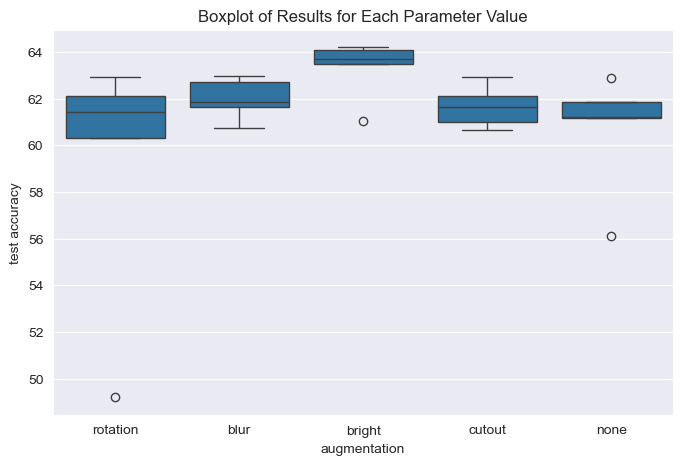

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from serialization import load

augs = ['rotation', 'blur', 'bright', 'cutout', 'none']
n = 5

data = []
for aug in augs:
    accuracy_results = []
    for i in range(1, n+1):
        newpath_history = f'output/history/cnn_lr={learning_rate}_drop={dropout}_beta={betas}_batch={batch_size}_aug={aug}/'
        history_path = os.path.join(newpath_history, f'history_{i}')
        history = load(history_path)
        accuracy_test = history["accuracy_test"]
        accuracy_results.append(accuracy_test)
    data.append(accuracy_results)
    
plot_data = []
for i in range(len(augs)):
    param = augs[i]
    results = data[i]
    for res in results:
        plot_data.append({"augmentation": param, "test accuracy": res})

df = pd.DataFrame(plot_data)

plt.figure(figsize=(8, 5))
sns.boxplot(x="augmentation", y="test accuracy", data=df)
plt.title('Boxplot of Results for Each Parameter Value')
plt.show()

# bright, blur and maybe cutout are better than models without augmentation
